In [226]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
#from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
#from sklearn.svm import SVC
#from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
#from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, ShuffleSplit, KFold
from sklearn.metrics import accuracy_score
#from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import recall_score, log_loss, make_scorer, confusion_matrix, precision_score, fbeta_score, f1_score, accuracy_score, classification_report

#from sklearn.ensemble import VotingClassifier

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report

from sklearn.ensemble import VotingClassifier

In [227]:

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold
from sklearn import feature_selection
from sklearn import model_selection
from sklearn.metrics import classification_report, precision_recall_curve
from sklearn.metrics import average_precision_score

from sklearn.metrics import confusion_matrix, accuracy_score 
from sklearn.metrics import f1_score, precision_score, recall_score, fbeta_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
from sklearn.metrics import auc, roc_auc_score, roc_curve
from sklearn.metrics import make_scorer, recall_score, log_loss


# 1. Data Preparation

Data preparation starts with an understanding of the available data for analysis. Customer churn data has around 38 fields. One of the important tasks is to determine which fields can be used for regression analysis. There are categorical data fields like Married, Gender, etc., and continuous numeric data fields like Tenure, Age, etc. Some of these fields may not be important for analysis such as City, Customer_ID, Offer, Streaming_Music, Unlimited_Data etc (which are related to customer service interactions). Some other fields which are not important for analysis are the Latitude and Longitude of the customer. We will also check data for null values and if found they will need to be handled appropriately.


In [228]:
data = pd.read_csv("telecom_customer_churn.csv")
data.head()

,Customer ID,Gender,Age,Married,Number of Dependents,Tenure in Months,Phone Service,Multiple Lines,Internet Service,Online Security,...,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Customer Status
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


#Removing spaces in Column names to avoid errors for processing column names
def column_name_remove_space(random_df):
    for x in random_df.columns:
        if " " in x:
            random_df = random_df.rename(columns={x:x.replace(" ","_").replace("(","")
                                    .replace(")","").replace(",","_").replace("/","_")})
    return random_df

In [229]:
# Removing spaces in Column names to avoid errors for processing column names
def column_name_remove_space(random_df):
    for x in random_df.columns:
        if " " in x:
            random_df = random_df.rename(columns={x:x.replace(" ","_").replace("(","")
                                    .replace(")","").replace(",","_").replace("/","_")})
    return random_df

In [230]:
#Calling class/function to remove and replace empty saces, any speacial characters in column names
data = column_name_remove_space(data)

In [231]:
data.isnull().any().any()

False

In [232]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer_ID             7043 non-null   object 
 1   Gender                  7043 non-null   object 
 2   Age                     7043 non-null   int64  
 3   Married                 7043 non-null   object 
 4   Number_of_Dependents    7043 non-null   object 
 5   Tenure_in_Months        7043 non-null   int64  
 6   Phone_Service           7043 non-null   object 
 7   Multiple_Lines          7043 non-null   object 
 8   Internet_Service        7043 non-null   object 
 9   Online_Security         7043 non-null   object 
 10  Online_Backup           7043 non-null   object 
 11  Device_Protection_Plan  7043 non-null   object 
 12  Premium_Tech_Support    7043 non-null   object 
 13  Streaming_TV            7043 non-null   object 
 14  Streaming_Movies        7043 non-null   

In [233]:
data.shape

(7043, 21)

<AxesSubplot:>

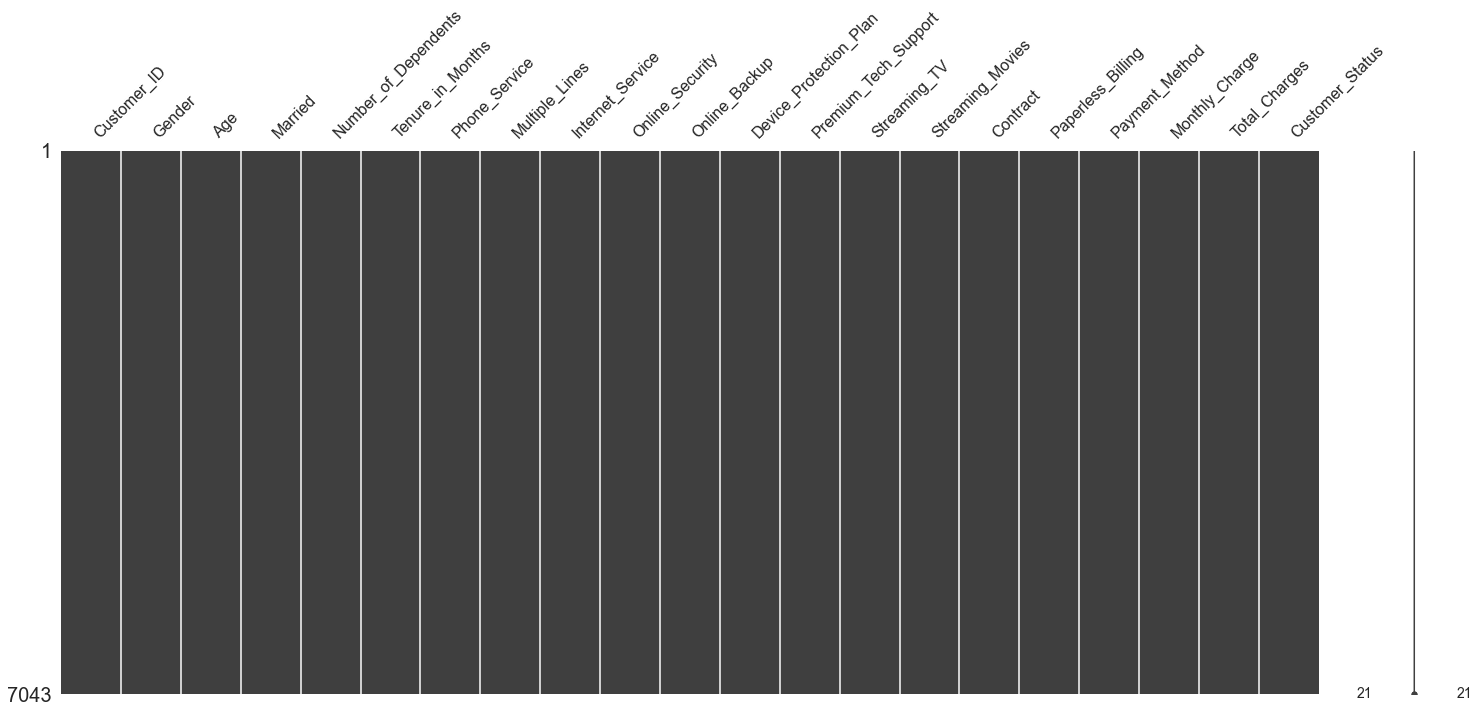

In [234]:
import missingno as msno
msno.matrix(data)

In [235]:
data = data.drop(["Customer_ID"], axis = 1)
data.head()

,Gender,Age,Married,Number_of_Dependents,Tenure_in_Months,Phone_Service,Multiple_Lines,Internet_Service,Online_Security,Online_Backup,Device_Protection_Plan,Premium_Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charge,Total_Charges,Customer_Status
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [236]:
data[data["Total_Charges"] == ' ']

,Gender,Age,Married,Number_of_Dependents,Tenure_in_Months,Phone_Service,Multiple_Lines,Internet_Service,Online_Security,Online_Backup,Device_Protection_Plan,Premium_Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charge,Total_Charges,Customer_Status
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [237]:
data['Total_Charges'] = pd.to_numeric(data.Total_Charges, errors='coerce')
data.isnull().sum()

Gender                     0
Age                        0
Married                    0
Number_of_Dependents       0
Tenure_in_Months           0
Phone_Service              0
Multiple_Lines             0
Internet_Service           0
Online_Security            0
Online_Backup              0
Device_Protection_Plan     0
Premium_Tech_Support       0
Streaming_TV               0
Streaming_Movies           0
Contract                   0
Paperless_Billing          0
Payment_Method             0
Monthly_Charge             0
Total_Charges             11
Customer_Status            0
dtype: int64

# 2 Data Processing 
Data is processing for analysis This section is for processing data set to identify which columns in the data set to take for analysis and which columns provides more waigtage for ML 

In [238]:
data[data["Tenure_in_Months"] == 0]

,Gender,Age,Married,Number_of_Dependents,Tenure_in_Months,Phone_Service,Multiple_Lines,Internet_Service,Online_Security,Online_Backup,Device_Protection_Plan,Premium_Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charge,Total_Charges,Customer_Status
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [239]:
data.drop(labels=data[data["Tenure_in_Months"] == 0].index, axis = 0, inplace = True)

In [240]:
data.fillna(data["Total_Charges"].mean())

,Gender,Age,Married,Number_of_Dependents,Tenure_in_Months,Phone_Service,Multiple_Lines,Internet_Service,Online_Security,Online_Backup,Device_Protection_Plan,Premium_Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charge,Total_Charges,Customer_Status
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [241]:
data['Total_Charges'] = pd.to_numeric(data.Total_Charges, errors='coerce')
data.isnull().sum()

Gender                    0
Age                       0
Married                   0
Number_of_Dependents      0
Tenure_in_Months          0
Phone_Service             0
Multiple_Lines            0
Internet_Service          0
Online_Security           0
Online_Backup             0
Device_Protection_Plan    0
Premium_Tech_Support      0
Streaming_TV              0
Streaming_Movies          0
Contract                  0
Paperless_Billing         0
Payment_Method            0
Monthly_Charge            0
Total_Charges             0
Customer_Status           0
dtype: int64

In [242]:
data.Age.unique()

array([0, 1], dtype=int64)

In [243]:
data.Age = data.Age.map({0: "No", 1: "Yes"})
data.head()

,Gender,Age,Married,Number_of_Dependents,Tenure_in_Months,Phone_Service,Multiple_Lines,Internet_Service,Online_Security,Online_Backup,Device_Protection_Plan,Premium_Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charge,Total_Charges,Customer_Status
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [244]:
data.Internet_Service.describe(include=["object", "bool"])

count            7032
unique              3
top       Fiber optic
freq             3096
Name: Internet_Service, dtype: object

# 3.Feature Selection

Feature selection is one of the first and important steps while performing any machine learning task. A feature in case of a dataset simply means a column. When we get any dataset, not necessarily every column (feature) is going to have an impact on the output variable. If we add these irrelevant features in the model, it will just make the model worst (Garbage In Garbage Out). This gives rise to the need of doing feature selection.

When it comes to implementation of feature selection in Pandas, Numerical and Categorical features are to be treated differently. Here we will first discuss about Numeric feature selection. Hence before implementing the following methods, we need to make sure that the DataFrame only contains Numeric features. Also, the following methods are discussed for regression problem, which means both the input and output variables are continuous in nature.

In [245]:
type_ = ["No", "Yes"]
fig = make_subplots(rows=1, cols=1)

fig.add_trace(go.Pie(labels=type_, values=data['Customer_Status'].value_counts(), name="Churn"))

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent+name", textfont_size=16)

fig.update_layout(
    title_text="Churn Distributions",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Churn Status', x=0.5, y=0.5, font_size=20, showarrow=False)])
fig.show()

In [246]:
data.Customer_Status[data.Customer_Status == "No"].groupby(by = data.Gender).count()

Gender
Female    2544
Male      2619
Name: Customer_Status, dtype: int64

In [247]:
data.Customer_Status[data.Customer_Status == "Yes"].groupby(by = data.Gender).count()

Gender
Female    939
Male      930
Name: Customer_Status, dtype: int64

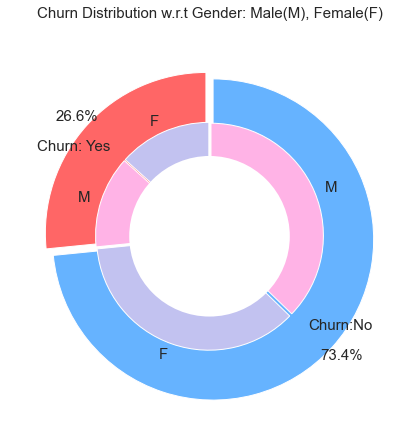

In [248]:
plt.figure(figsize=(6, 6))
labels =["Churn: Yes","Churn:No"]
values = [1869,5163]
labels_gender = ["F","M","F","M"]
sizes_gender = [939,930 , 2544,2619]
colors = ['#ff6666', '#66b3ff']
colors_gender = ['#c2c2f0','#ffb3e6', '#c2c2f0','#ffb3e6']
explode = (0.3,0.3) 
explode_gender = (0.1,0.1,0.1,0.1)
textprops = {"fontsize":15}
#Plot
plt.pie(values, labels=labels,autopct='%1.1f%%',pctdistance=1.08, labeldistance=0.8,colors=colors, startangle=90,frame=True, explode=explode,radius=10, textprops =textprops, counterclock = True, )
plt.pie(sizes_gender,labels=labels_gender,colors=colors_gender,startangle=90, explode=explode_gender,radius=7, textprops =textprops, counterclock = True, )
#Draw circle
centre_circle = plt.Circle((0,0),5,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Churn Distribution w.r.t Gender: Male(M), Female(F)', fontsize=15, y=1.1)

# show plot 
 
plt.axis('equal')
plt.tight_layout()
plt.show()

In [249]:
fig = px.histogram(data, x="Customer_Status", color = "Contract", barmode = "group", title = "<b>Customer contract distribution<b>")
fig.update_layout(width=700, height=500, bargap=0.2)
fig.show()

In [250]:
labels = data['Payment_Method'].unique()
values = data['Payment_Method'].value_counts()

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.update_layout(title_text="<b>Payment Method Distribution</b>")
fig.show()

fig = px.histogram(data, x="Customer_Status", color="Payment_Method", title="<b>Customer Payment Method distribution w.r.t. Churn</b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

In [251]:
 data[data["Gender"]=="Male"][["Internet_Service", "Customer_Status"]].value_counts()

Internet_Service  Customer_Status
DSL               No                 992
Fiber optic       No                 910
No                No                 717
Fiber optic       Yes                633
DSL               Yes                240
No                Yes                 57
dtype: int64

In [252]:
data[data["Gender"]=="Female"][["Internet_Service", "Customer_Status"]].value_counts()

Internet_Service  Customer_Status
DSL               No                 965
Fiber optic       No                 889
No                No                 690
Fiber optic       Yes                664
DSL               Yes                219
No                Yes                 56
dtype: int64

In [253]:
fig = go.Figure()

fig.add_trace(go.Bar(
  x = [['Churn:No', 'Churn:No', 'Churn:Yes', 'Churn:Yes'],
       ["Female", "Male", "Female", "Male"]],
  y = [965, 992, 219, 240],
  name = 'DSL',
))

fig.add_trace(go.Bar(
  x = [['Churn:No', 'Churn:No', 'Churn:Yes', 'Churn:Yes'],
       ["Female", "Male", "Female", "Male"]],
  y = [889, 910, 664, 633],
  name = 'Fiber optic',
))

fig.add_trace(go.Bar(
  x = [['Churn:No', 'Churn:No', 'Churn:Yes', 'Churn:Yes'],
       ["Female", "Male", "Female", "Male"]],
  y = [690, 717, 56, 57],
  name = 'No Internet',
))

fig.update_layout(title_text="<b>Churn Distribution w.r.t. Internet Service and Gender</b>")

fig.show()

In [254]:
color_map = {"Yes": "#FF97FF", "No": "#AB63FA"}
fig = px.histogram(data, x="Customer_Status", color="Number_of_Dependents", barmode="group", title="<b>Dependents distribution</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

In [255]:
color_map = {"Yes": '#FFA15A', "No": '#00CC96'}
fig = px.histogram(data, x="Customer_Status", color="Married", barmode="group", title="<b>Chrun distribution w.r.t. Partners</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

In [256]:
color_map = {"Yes": '#00CC96', "No": '#B6E880'}
fig = px.histogram(data, x="Customer_Status", color="Age", title="<b>Chrun distribution w.r.t. Senior Citizen(Age>60)</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

In [257]:
color_map = {"Yes": "#FF97FF", "No": "#AB63FA"}
fig = px.histogram(data, x="Customer_Status", color="Online_Security", barmode="group", title="<b>Churn w.r.t Online Security</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

In [258]:
color_map = {"Yes": '#FFA15A', "No": '#00CC96'}
fig = px.histogram(data, x="Customer_Status", color="Paperless_Billing",  title="<b>Chrun distribution w.r.t. Paperless Billing</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

In [259]:
fig = px.histogram(data, x="Customer_Status", color="Premium_Tech_Support",barmode="group",  title="<b>Chrun distribution w.r.t. TechSupport</b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

In [260]:
color_map = {"Yes": '#00CC96', "No": '#B6E880'}
fig = px.histogram(data, x="Customer_Status", color="Phone_Service", title="<b>Chrun distribution w.r.t. Phone Service</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

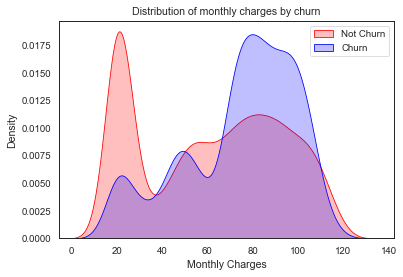

In [261]:

sns.set_context("paper",font_scale=1.1)
ax = sns.kdeplot(data.Monthly_Charge[(data["Customer_Status"] == 'No') ],
                color="Red", shade = True);
ax = sns.kdeplot(data.Monthly_Charge[(data["Customer_Status"] == 'Yes') ],
                ax =ax, color="Blue", shade= True);
ax.legend(["Not Churn","Churn"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('Monthly Charges');
ax.set_title('Distribution of monthly charges by churn');

Customers who are charged less that 40 a month seems to churn less. As the monthly rate increase, they churn more. Customers who churn the most pay between 70-100 a month


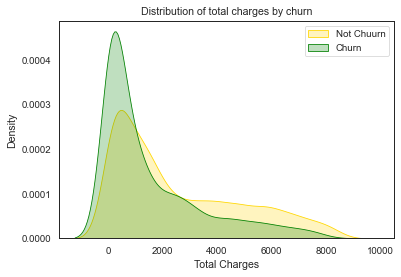

In [262]:
ax = sns.kdeplot(data.Total_Charges[(data["Customer_Status"] == 'No') ],
                color="Gold", shade = True);
ax = sns.kdeplot(data.Total_Charges[(data["Customer_Status"] == 'Yes') ],
                ax =ax, color="Green", shade= True);
ax.legend(["Not Chuurn","Churn"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('Total Charges');
ax.set_title('Distribution of total charges by churn');

In [263]:
fig = px.box(data, x='Customer_Status', y = 'Tenure_in_Months')

# Update yaxis properties
fig.update_yaxes(title_text='Tenure (Months)', row=1, col=1)
# Update xaxis properties
fig.update_xaxes(title_text='Churn', row=1, col=1)

# Update size and title
fig.update_layout(autosize=True, width=750, height=600,
    title_font=dict(size=25, family='Courier'),
    title='<b>Tenure vs Churn</b>',
)

fig.show()

Label Encoding refers to converting the labels into a numeric form so as to convert them into the machine-readable form. Machine learning algorithms can then decide in a better way how those labels must be operated. It is an important pre-processing step for the structured dataset in supervised learning

In [264]:
#Create a label encoder object
le = LabelEncoder()
# Label Encoding will be used for columns with 2 or less unique 
values
le_count = 0
for col in data.columns[1:]:
    if data[col].dtype == 'object':
        if len(list(data[col].unique())) <= 2:
            le.fit(data[col])
            data[col] = le.transform(data[col])
            le_count += 1
print('{} columns were label encoded.'.format(le_count))

6 columns were label encoded.


Text(0.5, 1.0, 'Correlation with Churn Rate \n')

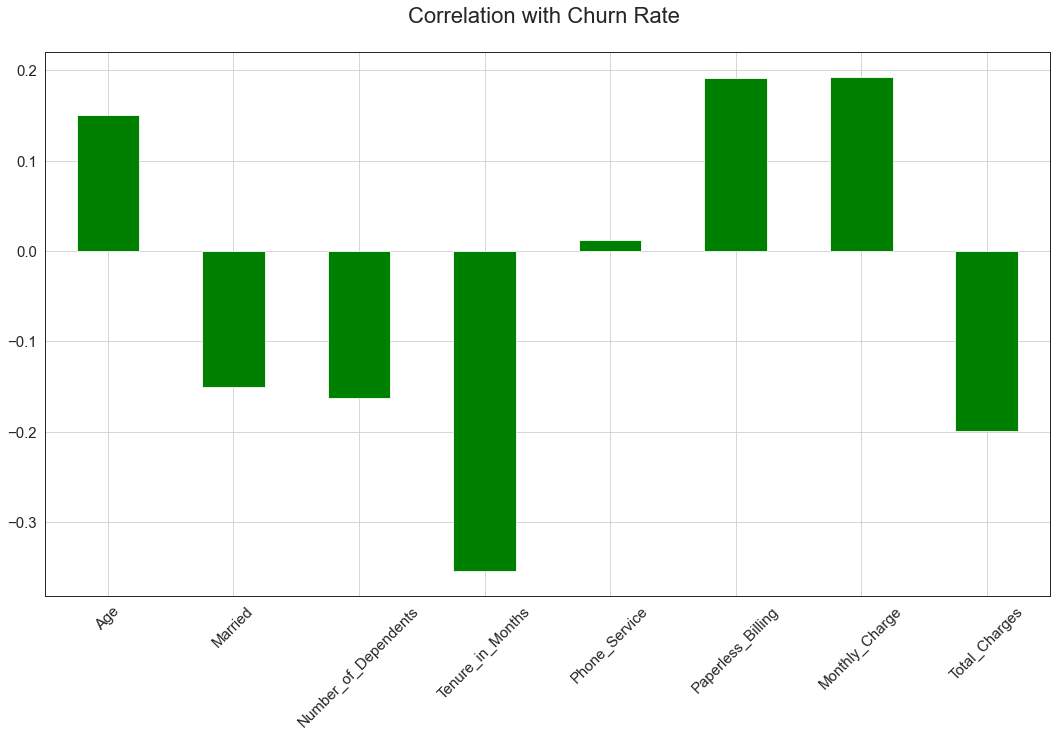

In [265]:
#Determining influencing factors based on churn. As per below graph 'MonthlyCharges' are most influencing factor
data2 = data[['Age', 'Married', 'Number_of_Dependents', 'Tenure_in_Months', 'Phone_Service', 'Paperless_Billing', 'Monthly_Charge', 'Total_Charges']]

correlations = data2.corrwith(data.Customer_Status)
correlations = correlations[correlations!=1]
positive_correlations = correlations[correlations >0].sort_values(ascending = False)
negative_correlations =correlations[correlations<0].sort_values(ascending = False)

correlations.plot.bar(
        figsize = (18, 10), 
        fontsize = 15, 
        color = 'green',
        rot = 45, grid = True)
plt.title('Correlation with Churn Rate \n',
horizontalalignment="center", fontstyle = "normal", 
fontsize = "22", fontfamily = "sans-serif")


# 4. Filter Method
Here we will first plot the Pearson correlation heatmap and see the correlation of independent variables with selected features. We will only select features which has correlation of above 0.5 (taking absolute value) with the output variable.

The correlation coefficient has values between -1 to 1 — A value closer to 0 implies weaker correlation (exact 0 implying no correlation) — A value closer to 1 implies stronger positive correlation — A value closer to -1 implies stronger negative correlation

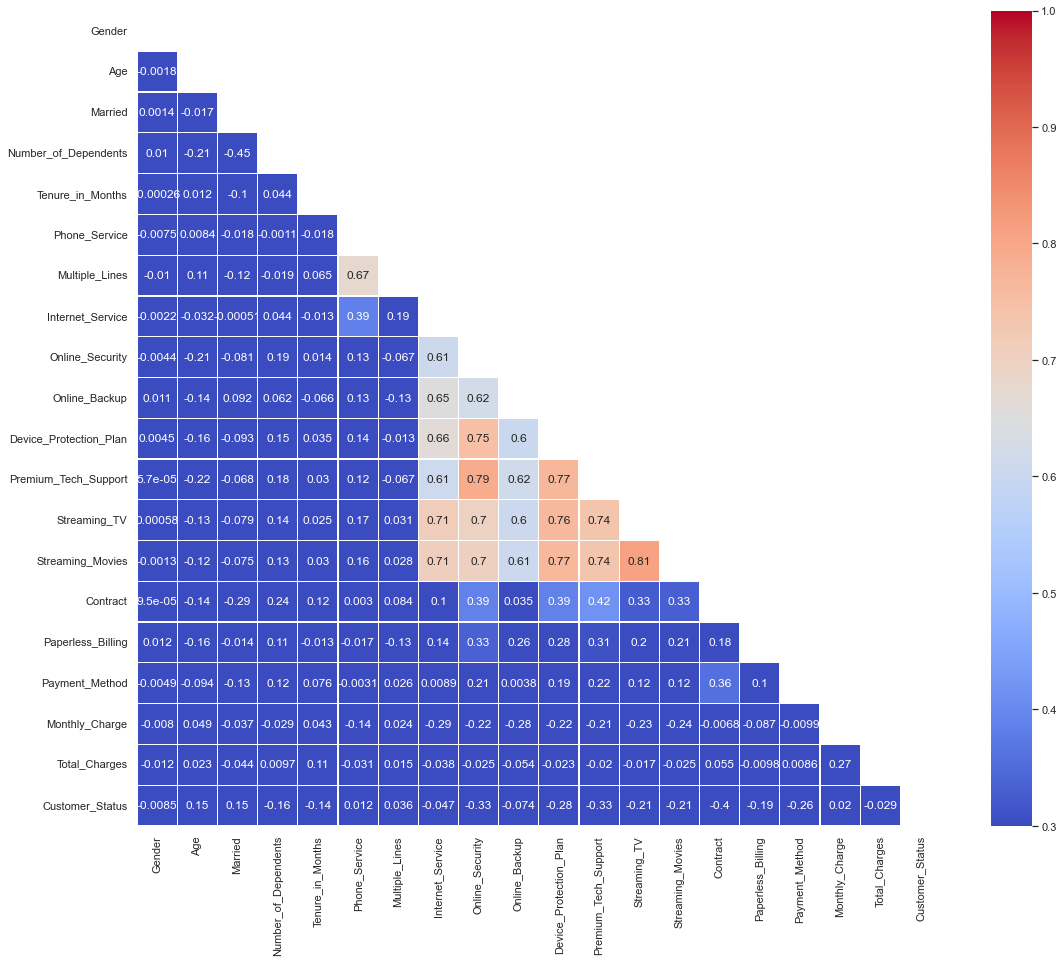

In [266]:
#Set and compute the Correlation Matrix:
sns.set(style="white")
plt.figure(figsize=(18, 15))

corr = data.apply(lambda x: pd.factorize(x)[0]).corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

ax = sns.heatmap(corr, mask=mask, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, linewidths=.2, cmap='coolwarm', vmin=0.3, vmax=1)


<AxesSubplot:>

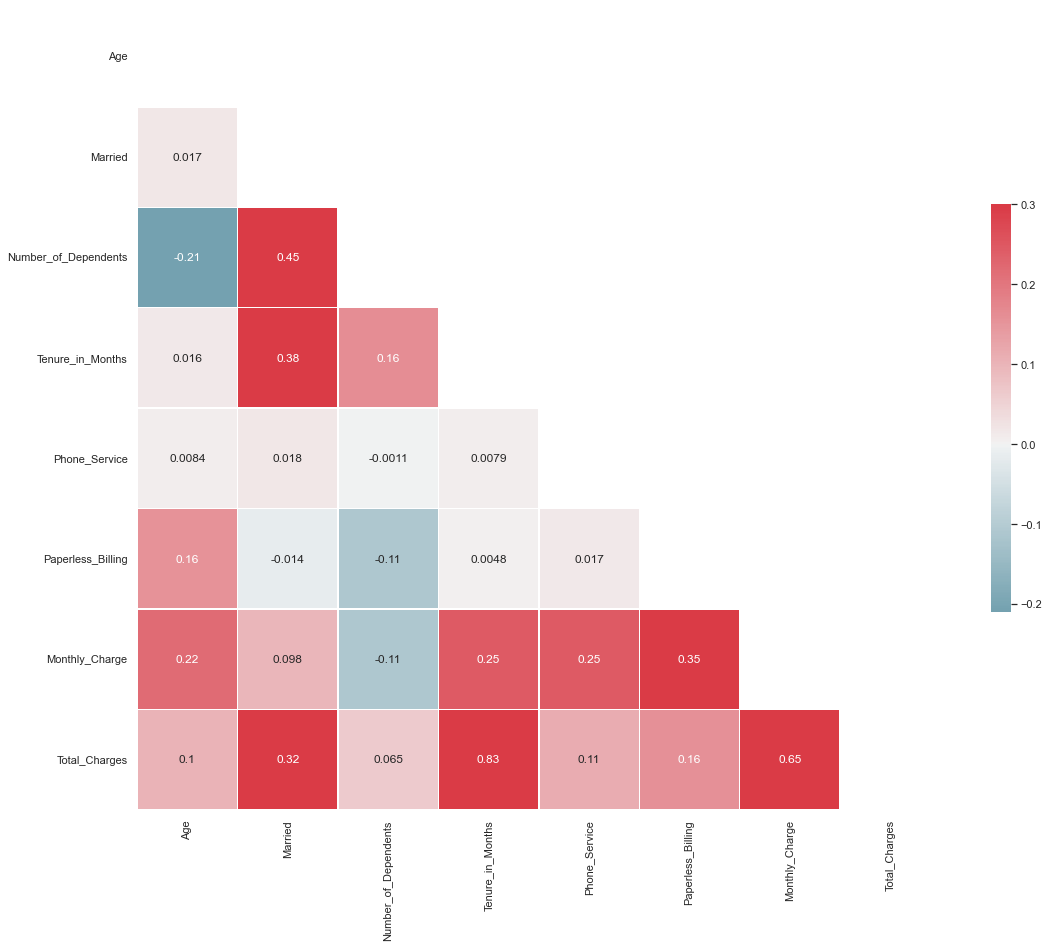

In [267]:
#Set and compute the Correlation Matrix on influencing factors
sns.set(style="white")
corr = data2.corr()

#Generate a mask for the upper triangle:

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

#Set up the matplotlib figure and a diverging colormap:
f, ax = plt.subplots(figsize=(18, 15))
cmap = sns.diverging_palette(220, 10, as_cmap=True)

#Draw the heatmap with the mask and correct aspect ratio:
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,square=True,annot = True, linewidths=.5, cbar_kws={"shrink": .5})

In [268]:
# Encoding values into binary format for machine learing algorithm
def encode_data(dataframe):
    if dataframe.dtype == "object":
        dataframe = LabelEncoder().fit_transform(dataframe)
    return dataframe

data = data.apply(lambda x: encode_data(x))
data.head()

,Gender,Age,Married,Number_of_Dependents,Tenure_in_Months,Phone_Service,Multiple_Lines,Internet_Service,Online_Security,Online_Backup,Device_Protection_Plan,Premium_Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charge,Total_Charges,Customer_Status
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [271]:
# Making churn in Y axis 
X = data.drop(columns = "Customer_Status")
y = data["Customer_Status"].values
print(X)

      Gender  Age  Married  Number_of_Dependents  Tenure_in_Months  \
0          0    0        1                     0                 1   
1          1    0        0                     0                34   
2          1    0        0                     0                 2   
3          1    0        0                     0                45   
4          0    0        0                     0                 2   
...      ...  ...      ...                   ...               ...   
7038       1    0        1                     1                24   
7039       0    0        1                     1                72   
7040       0    0        1                     1                11   
7041       1    1        1                     0                 4   
7042       1    0        0                     0                66   

      Phone_Service  Multiple_Lines  Internet_Service  Online_Security  \
0                 0               1                 0                0   
1          

In [272]:
#Setting up train, test and split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 4, stratify =y)

In [273]:
#Defining the function for distplot(Distribution)
def distplot(feature, frame, color='r'):
    plt.figure(figsize=(8,3))
    plt.title("Distribution for {}".format(feature))
    ax = sns.distplot(frame[feature], color= color)

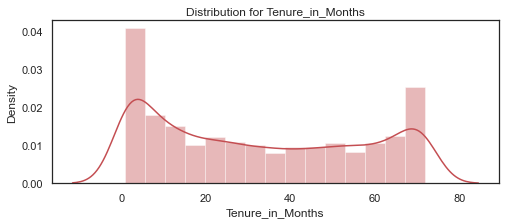

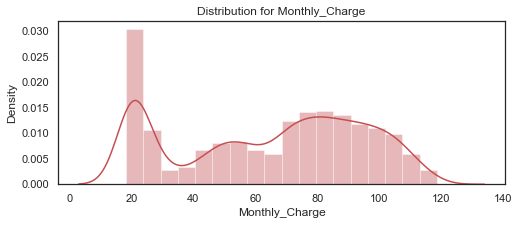

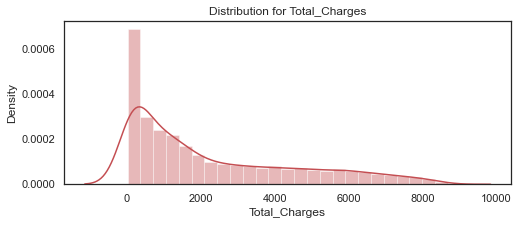

In [274]:
#Features distribution plots
col =  ["Tenure_in_Months", 'Monthly_Charge', 'Total_Charges']
for features in col :distplot(features, data)

As we can see, customers who churn(Customer Status) seems on average to stay less in the company and have a monthly greater charges compare to those who do not churn.

From the observations above, it looks like:

The tenure seems to be bimodal. The first most represent who haven't been in the company for a long time, the second some faithfull customers who have been with the company for a very long time. Looking at Monthlycharges, It looks like newer customer are charged more than those who stay longer with the company. 


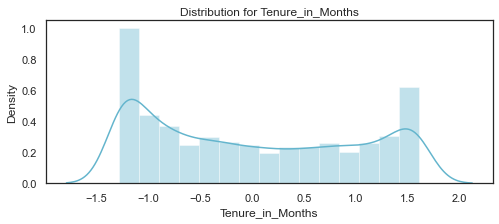

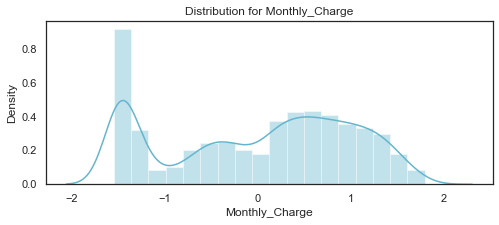

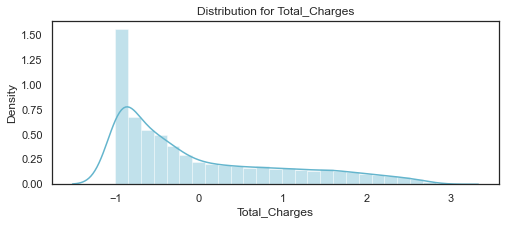

In [275]:

data_std = pd.DataFrame(StandardScaler().fit_transform(data[col]).astype('float64'), columns = col)
for feat in col: distplot(feat, data_std, color='c')

In [276]:
data.columns

Index(['Gender', 'Age', 'Married', 'Number_of_Dependents', 'Tenure_in_Months',
       'Phone_Service', 'Multiple_Lines', 'Internet_Service',
       'Online_Security', 'Online_Backup', 'Device_Protection_Plan',
       'Premium_Tech_Support', 'Streaming_TV', 'Streaming_Movies', 'Contract',
       'Paperless_Billing', 'Payment_Method', 'Monthly_Charge',
       'Total_Charges', 'Customer_Status'],
      dtype='object')

In [277]:
for i in data.columns:
    print(i, ": ", data[i].unique())

Gender :  [0 1]
Age :  [0 1]
Married :  [1 0]
Number_of_Dependents :  [0 1]
Tenure_in_Months :  [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
Phone_Service :  [0 1]
Multiple_Lines :  [1 0 2]
Internet_Service :  [0 1 2]
Online_Security :  [0 2 1]
Online_Backup :  [2 0 1]
Device_Protection_Plan :  [0 2 1]
Premium_Tech_Support :  [0 2 1]
Streaming_TV :  [0 2 1]
Streaming_Movies :  [0 2 1]
Contract :  [0 1 2]
Paperless_Billing :  [1 0]
Payment_Method :  [2 3 0 1]
Monthly_Charge :  [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
Total_Charges :  [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Customer_Status :  [0 1]


One-Hot Encoding - Refer https://machinelearningmastery.com/why-one-hot-encode-data-in-machine-learning/

In [278]:
# Divide the columns into 3 categories, one for standardisation, one for label encoding and one for one hot encoding

cat_cols_ohe =['Payment_Method', 'Contract', 'Internet_Service'] # those that need one-hot encoding
cat_cols_le = list(set(X_train.columns)- set(col) - set(cat_cols_ohe)) #those that need label encoding

print(cat_cols_le)

['Married', 'Phone_Service', 'Paperless_Billing', 'Streaming_TV', 'Online_Security', 'Multiple_Lines', 'Number_of_Dependents', 'Device_Protection_Plan', 'Online_Backup', 'Gender', 'Age', 'Streaming_Movies', 'Premium_Tech_Support']


In [279]:
#To get scalar values to fit into transform test and train model
scaler = StandardScaler()
X_train[col] = StandardScaler().fit_transform(X_train[col])
X_test[col] = StandardScaler().fit_transform(X_test[col])

In [280]:
#Machine Learning Models selection for Telecom Churn Data Prediction
models = []
models.append(('Logistic Regression', LogisticRegression(solver='liblinear', random_state = 0, class_weight='balanced')))
models.append(('KNN', KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)))
models.append(('Decision Tree Classifier', DecisionTreeClassifier(criterion = 'entropy', random_state = 0)))
models.append(('Random Forest', RandomForestClassifier(n_estimators=100, criterion = 'entropy', random_state = 0)))
models.append(("Adaboost", AdaBoostClassifier()))

In [281]:
#Measuring selected algorithms for ROC AUC Mean, ROC AUC STD, Accuracy Mean and Accuracy STD 
#This output is required to determine which algorithm best fit for the churn prediction
acc_results =[]
auc_results =[]
names = []

result_col = ["Algorithm", "ROC AUC Mean", "ROC AUC STD", "Accuracy Mean", "Accuracy STD"]
model_results = pd.DataFrame(columns = result_col)

i=0
# K- fold cross validation

for name, model in models:
    names.append(name)
    kfold = model_selection.KFold(n_splits=10, random_state=None)
    
    cv_acc_results = model_selection.cross_val_score(model, X_train, y_train, 
                    cv = kfold, scoring="accuracy")
    cv_auc_results = model_selection.cross_val_score(model, X_train, y_train,
                    cv = kfold, scoring="roc_auc")
    acc_results.append(cv_acc_results)
    auc_results.append(cv_auc_results)
    
    model_results.loc[i] = [name, 
                           round(cv_auc_results.mean()*100,2),
                           round(cv_auc_results.std()*100,2),
                           round(cv_acc_results.mean()*100,2),
                           round(cv_acc_results.std()*100,2)]
    i+=1

model_results.sort_values(by = ['ROC AUC Mean'], ascending=False)

,Algorithm,ROC AUC Mean,ROC AUC STD,Accuracy Mean,Accuracy STD
4,Adaboost,84.55,1.25,80.09,1.77
0,Logistic Regression,84.39,1.47,74.38,1.94
3,Random Forest,82.75,2.01,78.67,1.98
1,KNN,77.15,1.47,75.86,2.03
2,Decision Tree Classifier,66.67,1.07,73.73,1.12


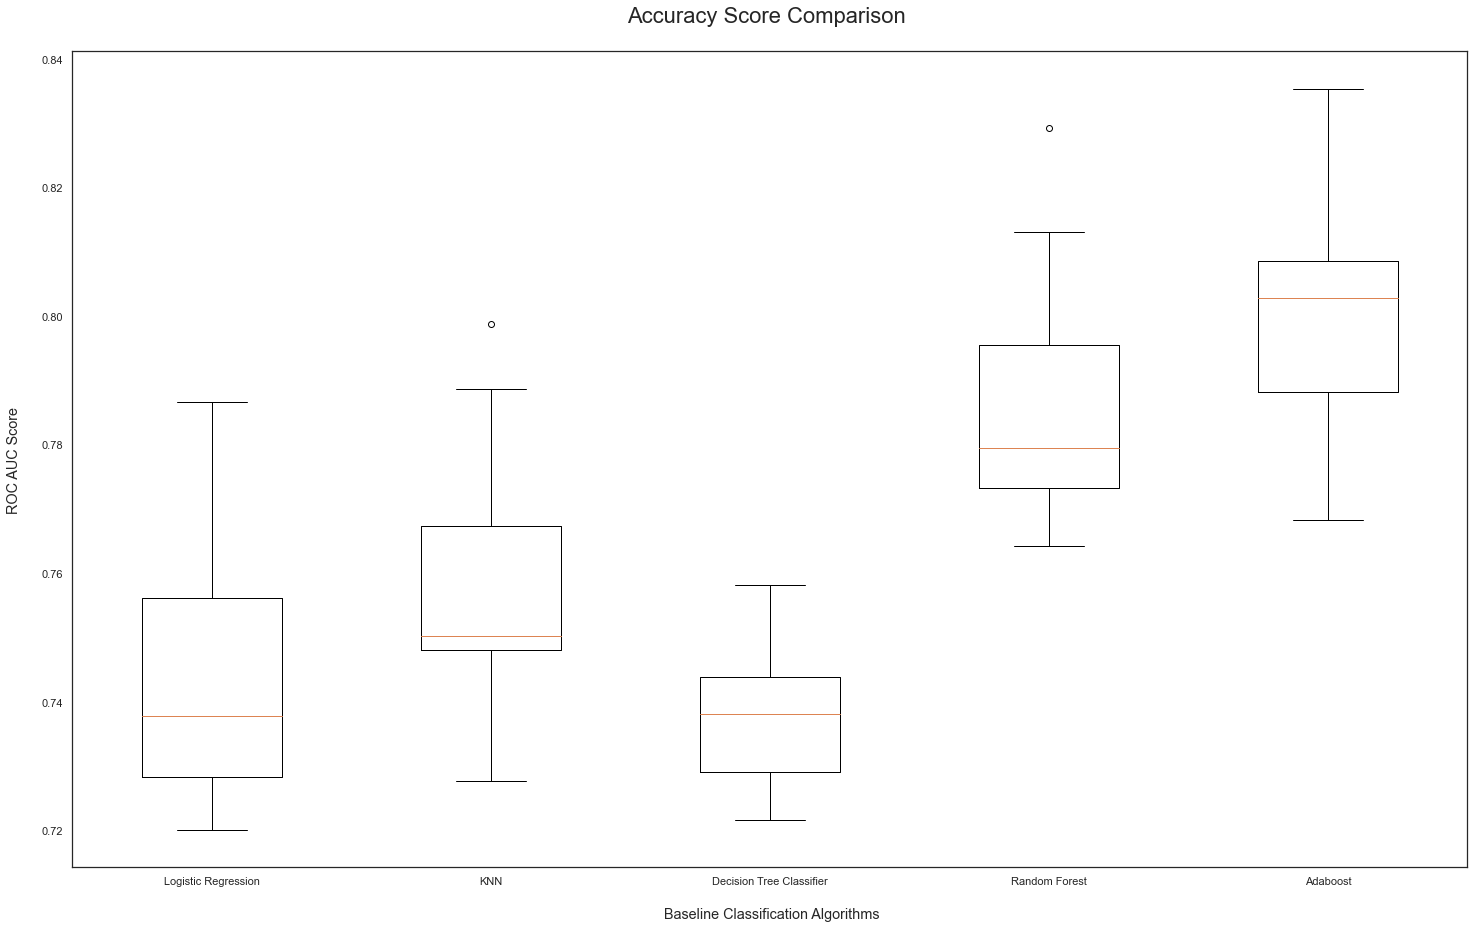

In [282]:
#Plotting Accuracy Score comparision among machine learing models
fig = plt.figure(figsize=(25,15))
ax = fig.add_subplot(111)
plt.boxplot(acc_results)
ax.set_xticklabels(names)

# ROC AUC Mean taking as ROC AUC Score
plt.ylabel('ROC AUC Score\n',
horizontalalignment="center",fontstyle = "normal", 
fontsize = "large", fontfamily = "sans-serif")

plt.xlabel('\n Baseline Classification Algorithms\n',
horizontalalignment="center",fontstyle = "normal", 
fontsize = "large", fontfamily = "sans-serif")

plt.title('Accuracy Score Comparison \n',
horizontalalignment="center", fontstyle = "normal", 
fontsize = "22", fontfamily = "sans-serif")

plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
plt.show()

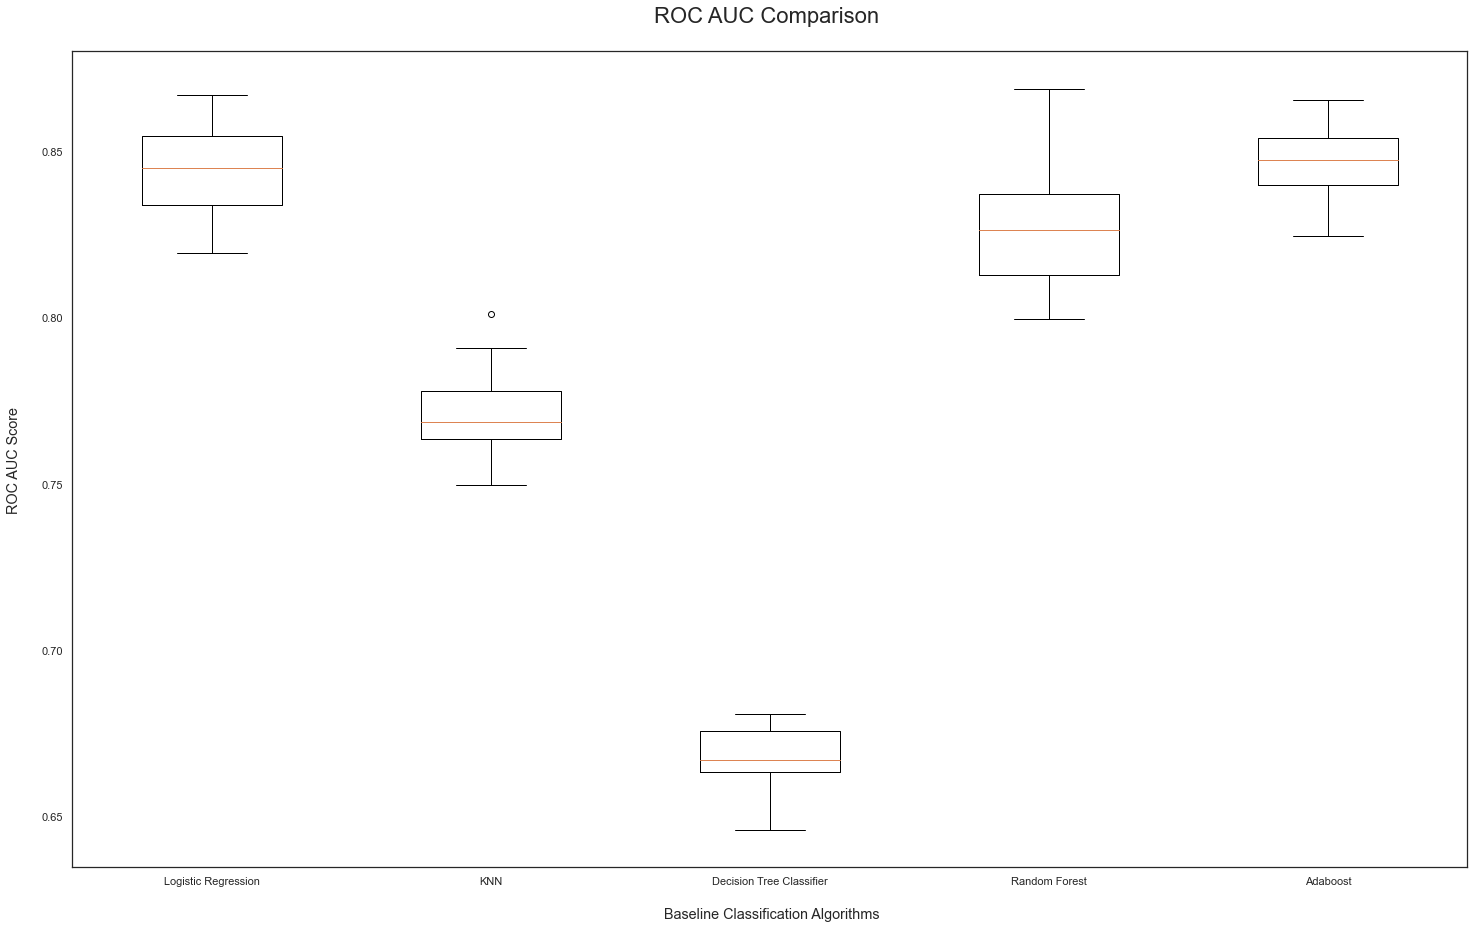

In [283]:
#Plotting ROC AUC comparision among machine learing models
fig = plt.figure(figsize=(25,15))
ax = fig.add_subplot(111)
plt.boxplot(auc_results)
ax.set_xticklabels(names)

plt.ylabel('ROC AUC Score\n',
horizontalalignment="center",fontstyle = "normal", 
fontsize = "large", fontfamily = "sans-serif")

plt.xlabel('\n Baseline Classification Algorithms\n',
horizontalalignment="center",fontstyle = "normal", 
fontsize = "large", fontfamily = "sans-serif")

plt.title('ROC AUC Comparison \n',
horizontalalignment="center", fontstyle = "normal", 
fontsize = "22", fontfamily = "sans-serif")

plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
plt.show()

In [284]:

score_array = []

for each in range(1,25):
    knn_loop = KNeighborsClassifier(n_neighbors = each) 
    knn_loop.fit(X_train,y_train)
    score_array.append(knn_loop.score(X_test,y_test))

score_array

[0.7156398104265402,
 0.7573459715639811,
 0.7469194312796209,
 0.771090047393365,
 0.7720379146919432,
 0.7895734597156399,
 0.7819905213270142,
 0.7848341232227488,
 0.776303317535545,
 0.7862559241706161,
 0.7786729857819905,
 0.781042654028436,
 0.7777251184834123,
 0.7805687203791469,
 0.781042654028436,
 0.7853080568720379,
 0.7838862559241706,
 0.790521327014218,
 0.7895734597156399,
 0.790521327014218,
 0.790521327014218,
 0.7890995260663507,
 0.7914691943127962,
 0.7924170616113744]

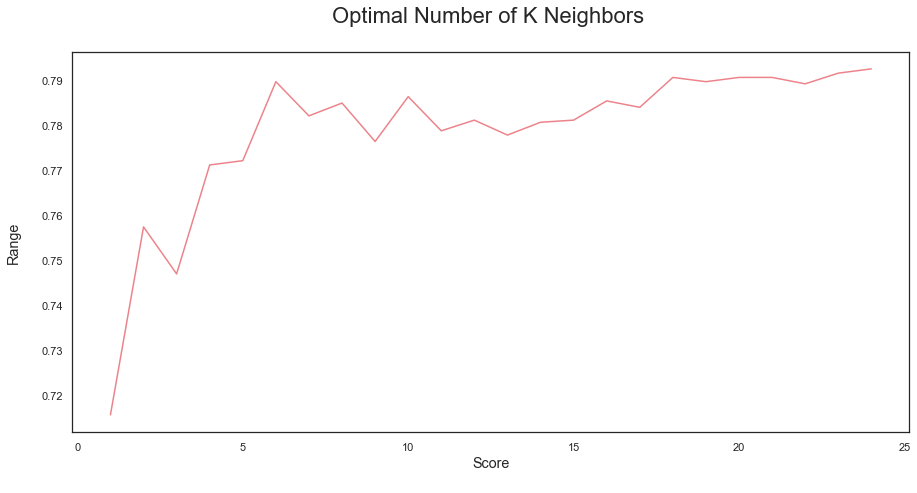

In [285]:
fig = plt.figure(figsize=(15, 7))
plt.plot(range(1,25),score_array, color = '#ec838a')
plt.ylabel('Range\n',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.xlabel('Score\n',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")

plt.title('Optimal Number of K Neighbors \n',horizontalalignment="center", fontstyle = "normal",fontsize = "22", fontfamily = "sans-serif")
#plt.legend(loc='top right', fontsize = "medium")

plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
plt.show()

In [286]:
score_array = []
for each in range(1,100):
    rf_loop = RandomForestClassifier(n_estimators = each, random_state = 1) 
    rf_loop.fit(X_train,y_train)
    score_array.append(rf_loop.score(X_test,y_test))

In [287]:
for i,j in enumerate(score_array):
    print(i+1,":",j)

1 : 0.7109004739336493
2 : 0.7511848341232228
3 : 0.7374407582938388
4 : 0.7578199052132701
5 : 0.7568720379146919
6 : 0.7720379146919432
7 : 0.7592417061611374
8 : 0.7682464454976303
9 : 0.7658767772511849
10 : 0.7682464454976303
11 : 0.7668246445497631
12 : 0.7720379146919432
13 : 0.771563981042654
14 : 0.7758293838862559
15 : 0.7744075829383886
16 : 0.7781990521327015
17 : 0.7758293838862559
18 : 0.781042654028436
19 : 0.7777251184834123
20 : 0.776303317535545
21 : 0.7734597156398104
22 : 0.7805687203791469
23 : 0.7838862559241706
24 : 0.7853080568720379
25 : 0.7829383886255924
26 : 0.7890995260663507
27 : 0.7848341232227488
28 : 0.7848341232227488
29 : 0.7819905213270142
30 : 0.7853080568720379
31 : 0.7800947867298578
32 : 0.7834123222748816
33 : 0.781042654028436
34 : 0.781042654028436
35 : 0.7800947867298578
36 : 0.7800947867298578
37 : 0.7834123222748816
38 : 0.7805687203791469
39 : 0.781042654028436
40 : 0.7824644549763033
41 : 0.7838862559241706
42 : 0.7791469194312797
43 : 0.

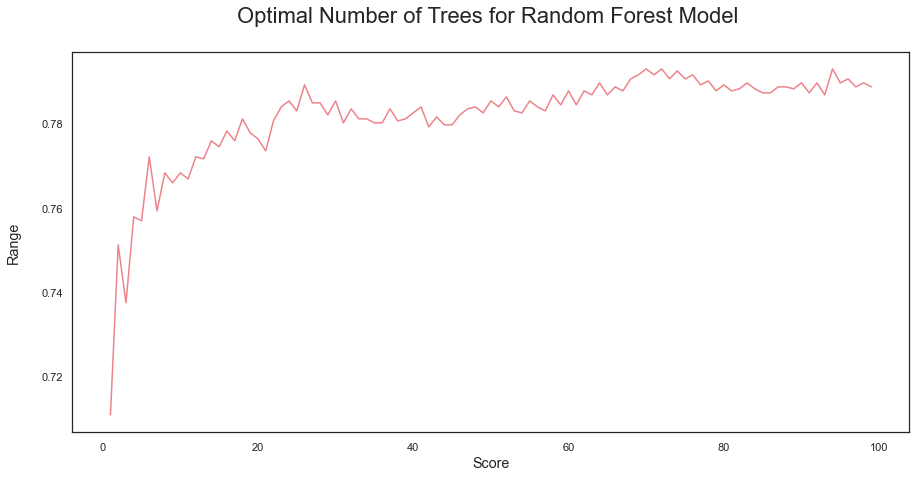

In [288]:
fig = plt.figure(figsize=(15, 7))
plt.plot(range(1,100),score_array, color = '#ec838a')
plt.ylabel('Range\n',horizontalalignment="center",
fontstyle = "normal", fontsize = "large", 
fontfamily = "sans-serif")
plt.xlabel('Score\n',horizontalalignment="center",
fontstyle = "normal", fontsize = "large", 
fontfamily = "sans-serif")
plt.title('Optimal Number of Trees for Random Forest Model \n',horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
#plt.legend(loc='top right', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
plt.show()

2nd Iteration

In [289]:
#evaluation of results
def model_evaluation(y_test, y_pred, model_name):
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    f2 = fbeta_score(y_test, y_pred, beta = 2.0)

    results = pd.DataFrame([[model_name, acc, prec, rec, f1, f2]], 
                       columns = ["Model", "Accuracy", "Precision", "Recall",
                                 "F1 SCore", "F2 Score"])
    results = results.sort_values(["Precision", "Recall", "F2 Score"], ascending = False)
    return results

In [290]:
# Logistic regression
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

#knn
classifier2 = KNeighborsClassifier(n_neighbors=22, metric="minkowski", p=2)
classifier2.fit(X_train, y_train)
y_pred2 = classifier2.predict(X_test)

#Decision tree
classifier3 = DecisionTreeClassifier(criterion="entropy", random_state=0)
classifier3.fit(X_train, y_train)
y_pred3 = classifier3.predict(X_test)

#Random Forest

classifier4 = RandomForestClassifier(n_estimators=72, criterion="entropy", random_state=0)
classifier4.fit(X_train, y_train)
y_pred4 = classifier4.predict(X_test)

#Adaboost
classifier5 = AdaBoostClassifier()
classifier5.fit(X_train, y_train)
y_pred5 = classifier5.predict(X_test)


In [291]:
lr = model_evaluation(y_test, y_pred, "Logistic Regression")
knn = model_evaluation(y_test, y_pred2, "K-Nearest Neighbours")
dt = model_evaluation(y_test, y_pred3, "Decision Tree")
rf = model_evaluation(y_test, y_pred4, "Random Forest")
ab = model_evaluation(y_test, y_pred5, "Adaboost")

In [292]:
eval_ =lr.append(knn).append(dt).append(rf).append(ab).sort_values(["Precision", "Recall", "F2 Score"], ascending = False).reset_index().drop(columns = "index")
eval_

,Model,Accuracy,Precision,Recall,F1 SCore,F2 Score
0,Adaboost,0.812322,0.687927,0.538324,0.604000,0.562803
1,Logistic Regression,0.805687,0.658281,0.559715,0.605010,0.576994
2,Random Forest,0.796682,0.650685,0.508021,0.570571,0.531320
3,K-Nearest Neighbours,0.789100,0.628889,0.504456,0.559842,0.525241
4,Decision Tree,0.732701,0.497364,0.504456,0.500885,0.503022


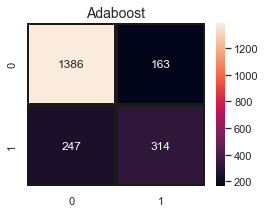

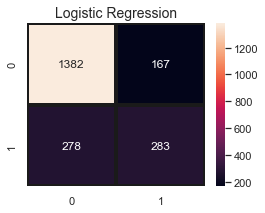

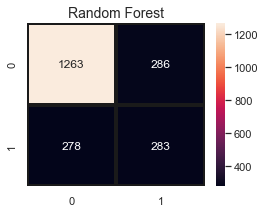

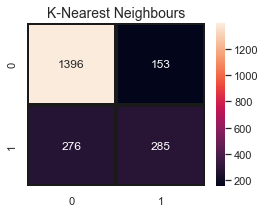

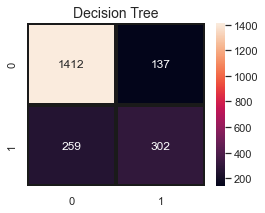

In [293]:
predictions = [y_pred, y_pred2 , y_pred3, y_pred4, y_pred5]

for i, j in zip(predictions, eval_.Model.values):
    plt.figure(figsize=(4,3))
    sns.heatmap(confusion_matrix(y_test, i),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
    plt.title(j,fontsize=14)
    plt.show()

From the confusion matrix we can see that: There are total 1383+166=1549 actual non-churn values and the algorithm predicts 1400 of them as non churn and 149 of them as churn. While there are 280+280=561 actual churn values and the algorithm predicts 280 of them as non churn values and 281 of them as churn values.

In [294]:
# Model Evaluation

In [295]:
def k_fold_cross_validation(classifier_name, name):
    accuracies = cross_val_score(estimator=classifier_name,
                            X=X_train, y=y_train, cv =10)
    print(name, "accuracy: %0.2f (+/- %0.2f)"  % (accuracies.mean(), accuracies.std() * 2))

In [296]:
k_fold_cross_validation(classifier5, "Adaboost")

Adaboost accuracy: 0.80 (+/- 0.03)


In [297]:
k_fold_cross_validation(classifier, "Logistic regression")

Logistic regression accuracy: 0.80 (+/- 0.04)


In [298]:
k_fold_cross_validation(classifier3, "Decision Tree")

Decision Tree accuracy: 0.73 (+/- 0.03)


In [299]:
# ROC Curve

def ROC_curve(classifier_, name, y_pred_):
    classifier_.fit(X_train, y_train) 
    probs = classifier_.predict_proba(X_test) 
    probs = probs[:, 1] 
    classifier_roc_auc = roc_auc_score(y_test, probs )
    rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, classifier_.predict_proba(X_test)[:,1])
    plt.figure(figsize=(14, 6))

    label_ = name + '(area = %0.2f)' % classifier_roc_auc
    # Plot Adaboost ROC
    plt.plot(rf_fpr, rf_tpr, 
    label=label_)
    # Plot Base Rate ROC
    plt.plot([0,1], [0,1],label='Base Rate' 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.ylabel('True Positive Rate \n',horizontalalignment="center",
    fontstyle = "normal", fontsize = "medium", 
    fontfamily = "sans-serif")

    plt.xlabel('\nFalse Positive Rate \n',horizontalalignment="center",
    fontstyle = "normal", fontsize = "medium", 
    fontfamily = "sans-serif")

    plt.title('ROC Graph \n',horizontalalignment="center", 
    fontstyle = "normal", fontsize = "22", 
    fontfamily = "sans-serif")

    plt.legend(loc="lower right", fontsize = "medium")
    plt.xticks(rotation=0, horizontalalignment="center")
    plt.yticks(rotation=0, horizontalalignment="right")
    plt.show()

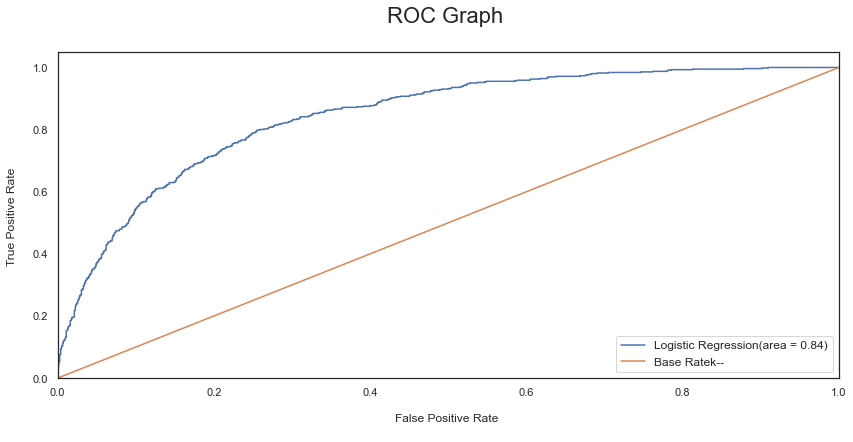

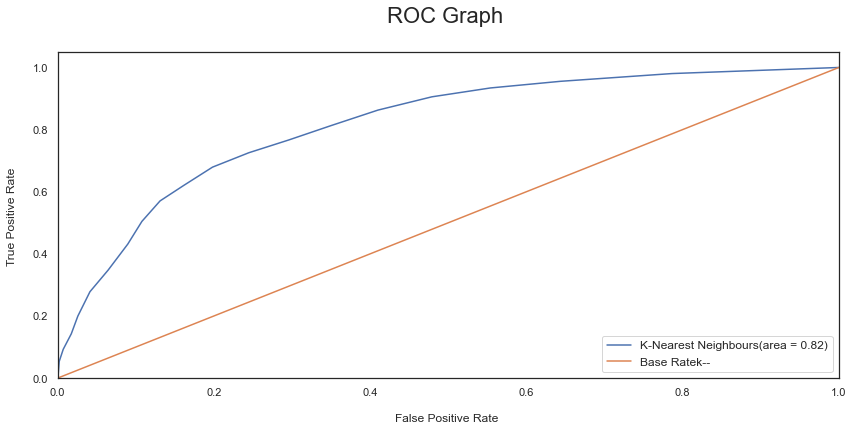

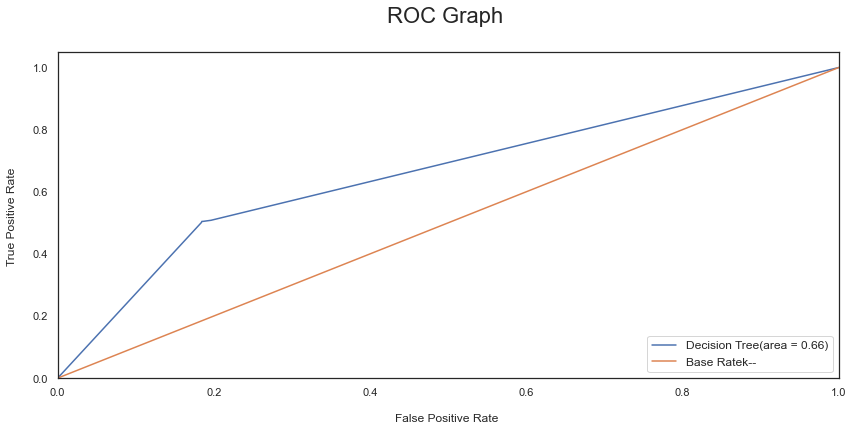

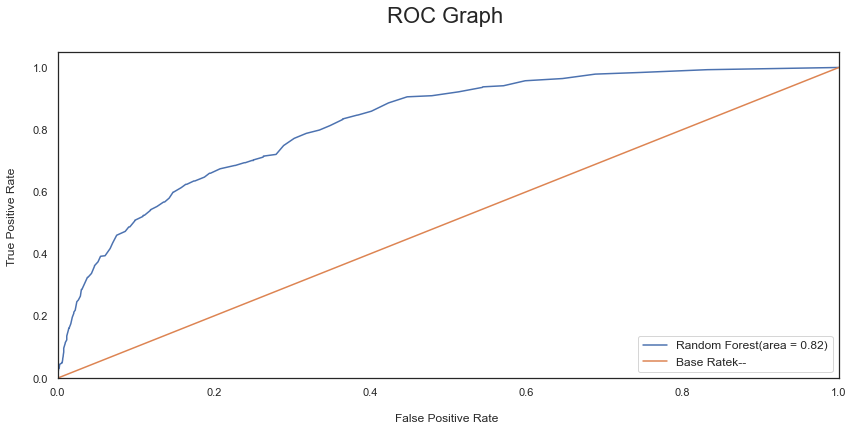

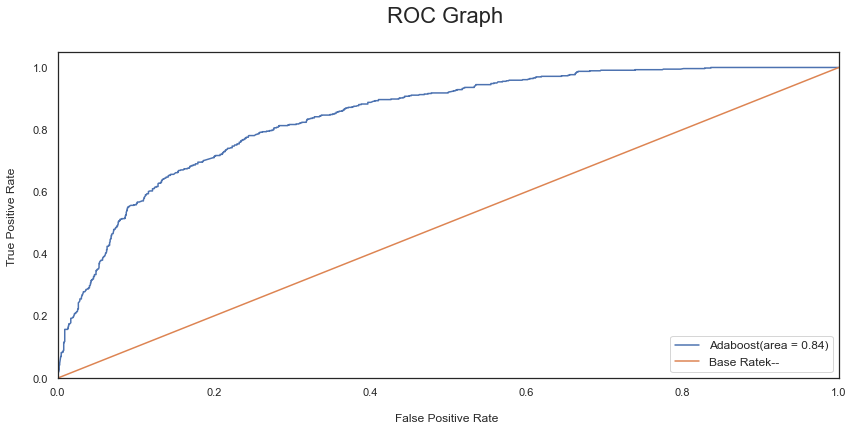

In [300]:
preds = [y_pred, y_pred2,  y_pred3, y_pred4, y_pred5]
classifiers = [classifier , classifier2, classifier3, classifier4, classifier5]
model_names_ = ["Logistic Regression",  "K-Nearest Neighbours", "Decision Tree", "Random Forest", "Adaboost" ]

for i, j, k in zip(classifiers, model_names_, predictions):
    ROC_curve(i, j, k) 

In [301]:
# Cross validation

from sklearn.model_selection import cross_val_score

# Function that will track the mean value and the standard deviation of the accuracy
def cvDictGen(functions, scr, X_train = X, y_train = y, cv = 5):
    cvDict = {}
    for func in functions:
        cvScore = cross_val_score(func, X_train, y_train, cv = cv, scoring = scr)
        cvDict[str(func).split('(')[0]] = [cvScore.mean(), cvScore.std()]
    
    return cvDict

In [302]:
cvD = cvDictGen(classifiers, scr = 'roc_auc')
cvD

{'LogisticRegression': [0.8413241495425814, 0.010508143640371679],
 'KNeighborsClassifier': [0.7912563680005372, 0.008202613025400839],
 'DecisionTreeClassifier': [0.6470213137060805, 0.02196953973039052],
 'RandomForestClassifier': [0.8197874155380965, 0.011556155864106703],
 'AdaBoostClassifier': [0.8445838813774079, 0.01125665302188384]}

Predicting feature importance

In [303]:
# Ada boost classifier
feature_importances = pd.concat([pd.DataFrame(data.columns, columns = ["features"]),
                                 pd.DataFrame(np.transpose(classifier5.feature_importances_), columns = ["coef"])],axis = 1)
feature_importances.sort_values(by = "coef", ascending = False)

,features,coef
18,Total_Charges,0.34
17,Monthly_Charge,0.20
4,Tenure_in_Months,0.14
14,Contract,0.12
16,Payment_Method,0.04
8,Online_Security,0.04
10,Device_Protection_Plan,0.02
15,Paperless_Billing,0.02
11,Premium_Tech_Support,0.02
9,Online_Backup,0.02


In [304]:
#Ada boost

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
adaHyperParams = {'n_estimators': [10,50,100,200,420], "learning_rate":  [0.001, 0.01, 0.1, 0.3]}
gridSearchAda = RandomizedSearchCV(estimator = classifier5, param_distributions = adaHyperParams, n_iter = 5,
                                   scoring = 'roc_auc') # other option accuracy
gridSearchAda.fit(X_train, y_train)

RandomizedSearchCV(estimator=AdaBoostClassifier(), n_iter=5,
                   param_distributions={'learning_rate': [0.001, 0.01, 0.1,
                                                          0.3],
                                        'n_estimators': [10, 50, 100, 200,
                                                         420]},
                   scoring='roc_auc')

In [305]:
gridSearchAda.best_params_, gridSearchAda.best_score_

({'n_estimators': 420, 'learning_rate': 0.1}, 0.8450951703673771)

In [306]:
bestAdaModFitted = gridSearchAda.best_estimator_.fit(X_train, y_train)

In [307]:
# Getting the score AdaBoost
test_labels = bestAdaModFitted.predict_proba(np.array(X_test.values))[:,1]
roc_auc_score(y_test,test_labels , average = 'macro', sample_weight = None)

0.8342096390172947

In [308]:
ABC = AdaBoostClassifier()

ABC_param_grid = {"n_estimators" :[10,50,100,200,420],
                  "learning_rate":  [0.001, 0.01, 0.1, 0.3]}

gsABC = GridSearchCV(ABC, param_grid = ABC_param_grid, cv = 10, scoring = "roc_auc", n_jobs = 6, verbose = 1)

gsABC.fit(X_train,y_train)

ada_best = gsABC.best_estimator_
print(ada_best)
print(gsABC.best_score_)

Fitting 10 folds for each of 20 candidates, totalling 200 fits
AdaBoostClassifier(learning_rate=0.1, n_estimators=200)
0.8470662551660079


In [309]:
bestAdaModFitted2 = gsABC.best_estimator_.fit(X_train, y_train)

In [310]:
test_labels = bestAdaModFitted2.predict_proba(np.array(X_test.values))[:,1]
roc_auc_score(y_test,test_labels , average = 'macro', sample_weight = None)

0.8451764061455324

In [311]:
# Comparing performance of the 5 models

performance = {'Model': ['Adaboost', 'Logistic Regression', 'Random Forest', 'K-Nearest Neighbours', 'Decision Tree'], 
               'Accuracy (%)': [81.23, 80.56, 79.66, 78.91, 73.27], 
               'Precision (%)': [68.79, 65.82, 65.06, 62.88, 49.73], 
               'F2 Score(%)': [56.28, 57.69, 53.13, 52.52, 50.30]
              }
perf = pd.DataFrame(data=performance)
perf

,Model,Accuracy (%),Precision (%),F2 Score(%)
0,Adaboost,81.23,68.79,56.28
1,Logistic Regression,80.56,65.82,57.69
2,Random Forest,79.66,65.06,53.13
3,K-Nearest Neighbours,78.91,62.88,52.52
4,Decision Tree,73.27,49.73,50.30


In [312]:
perf = perf.set_index('Model')

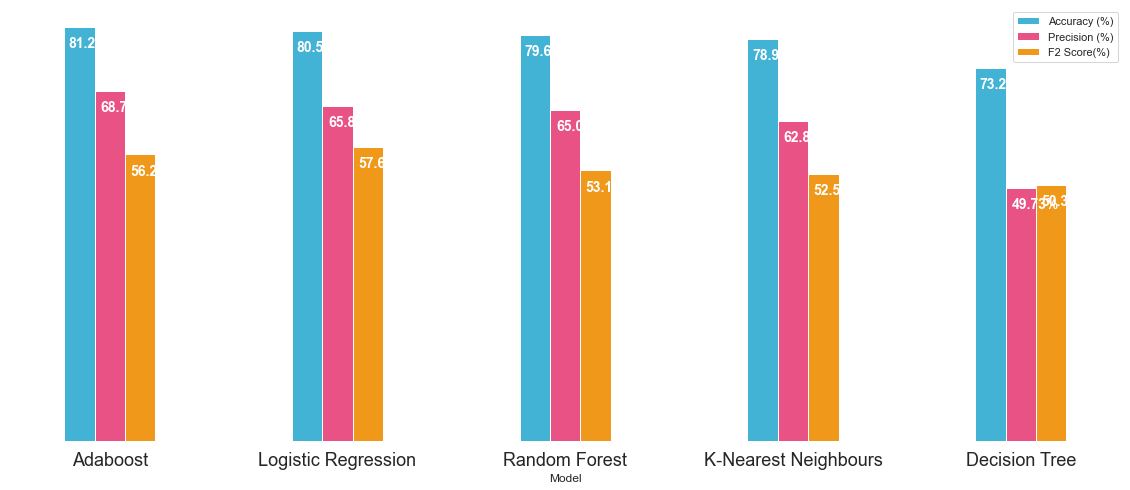

In [313]:
sns.set_style(style='white')

ax = perf.plot(kind='bar', figsize=(20,8), width=0.4, color=['#42b3d5', '#e85285', '#f09819'], fontsize=18)

ax.legend(loc='best')
plt.xticks(rotation=0, ha="center")

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(False)
ax.spines['left'].set_linewidth(False)

ax.get_yaxis().set_visible(False)

for n in range(3):
    for index, val in enumerate(perf.iloc[:,n].transpose()): 
        label=str(val) + '%'
        
        if n==0:
            ax.annotate(label, xy=(index - 0.18, val-4), color='#ffffff', fontsize=14, fontweight='bold')
        elif n==1:
            ax.annotate(label, xy=(index - 0.04, val-4), color='#ffffff', fontsize=14, fontweight='bold')
        elif n==2:
            ax.annotate(label, xy=(index + 0.09, val-4), color='#ffffff', fontsize=14, fontweight='bold')

#  Drawing conclusions — Summary

We have walked through a complete end-to-end machine learning project using the Telco customer Churn dataset. We started by cleaning the data and analyzing it with visualization. Then, to be able to build a machine learning model, we transformed the categorical data into numeric variables (feature engineering). After transforming the data, we tried 5 different machine learning algorithms using default parameters. Finally, we tuned the hyperparameters of the Adaboost (best performance model) for model optimization, obtaining an accuracy of nearly 81%.
